<a href="https://colab.research.google.com/github/ZaeemAkbarKhan786/MS_ProgrammingForAI/blob/main/informed_search_gbfs_and_astar.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

-------------------------------------------------------------------------------------------------------------------------------

# Name: Zaeem Akbar Khan

-------------------------------------------------------------------------------------------------------------------------------

# Represent the following Tree using Python Dictionary Data Structure and Apply Greedy Best First Search Algorithm

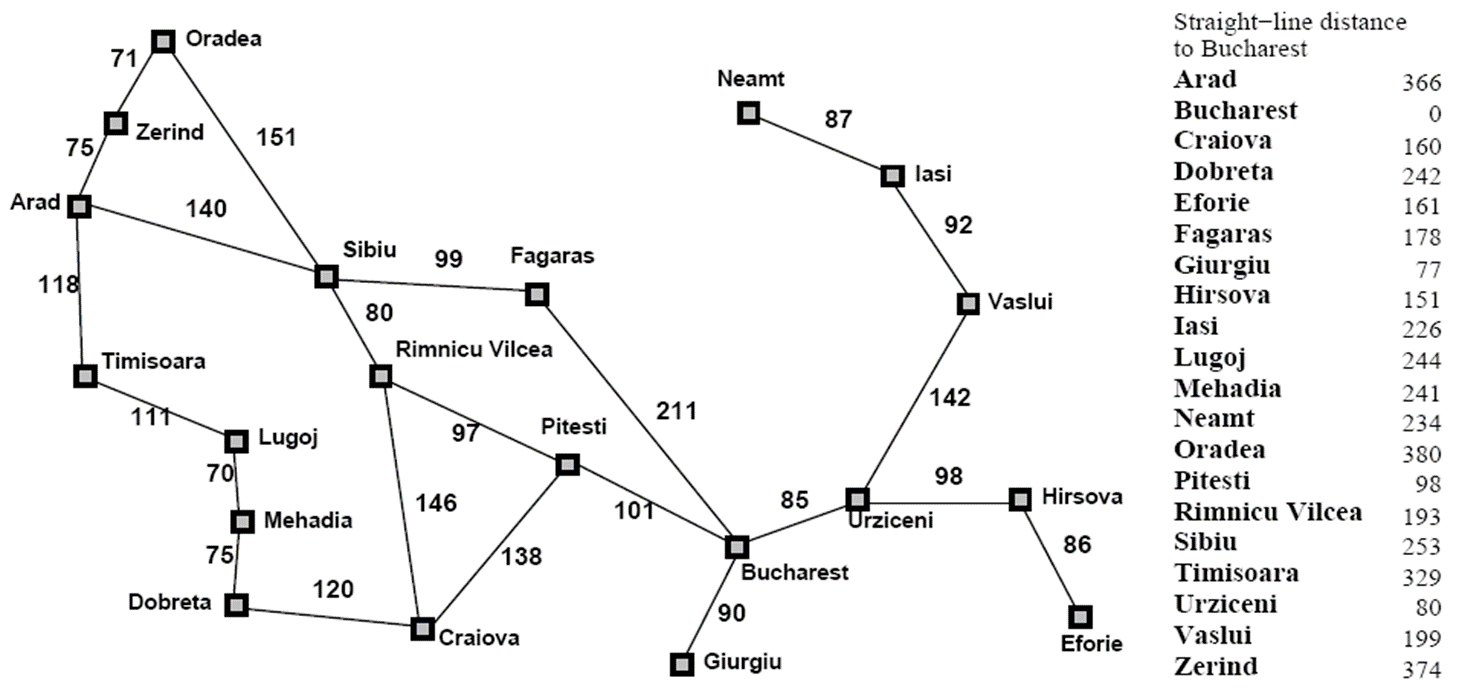

# Solution

In [1]:
from operator import itemgetter

def bfs_traversal(graph, start, goal):
    opened = [start]
    closed = []
    while opened:
        node = opened.pop(0)
        if node[0] == goal:
            closed.append(node[0])
            return closed
        opened += [item for item in graph[node[0]] if item not in opened and item not in closed]
        closed.append(node[0])
        opened.sort(key=itemgetter(1))
    return 'GOAL Not FOUND'

graph = {
    'Arad': [['Zerind', 374], ['Timisoara', 329], ['Sibiu', 253]],
    'Zerind': [['Oradea', 380], ['Arad', 366]],
    'Oradea': [['Sibiu', 253]],
    'Sibiu': [['Rimniciu Vilcea', 193], ['Fagaras', 178], ['Arad', 366]],
    'Fagaras': [['Sibiu', 253], ['Bucharest', 0]],
    'Rimniciu Vilcea': [['Pitesti', 98], ['Craiova', 160], ['Sibiu', 253]],
    'Timisoara': [['Lugoj', 244], ['Arad', 366]],
    'Lugoj': [['Mehadia', 241]],
    'Mehadia': [['Lugoj', 244], ['Dobreta', 242]],
    'Dobreta': [['Mehadia', 241], ['Craiova', 160]],
    'Pitesti': [['Craiova', 160], ['Bucharest', 0]],
    'Craiova': [['Pitesti', 98], ['Dobreta', 242], ['Rimniciu Vilcea', 193]],
    'Bucharest': [['Giurgiu', 77], ['Urziceni', 80], ['Fagaras', 178], ['Pitesti', 98]],
    'Giurgiu': [['Bucharest', 0]],
    'Urziceni': [['Vaslui', 199], ['Hirsova', 151], ['Bucharest', 0]],
    'Vaslui': [['Lasi', 226], ['Urziceni', 80]],
    'Lasi': [['Neamt', 234], ['Vaslui', 199]],
    'Neamt': [['Lasi', 226]],
    'Hirsova': [['Eforie', 161], ['Urziceni', 80]],
    'Eforie': [['Hirsova', 151]]
}

print("GBFS")
gbfsPath = bfs_traversal(graph, ['Neamt', 0], 'Bucharest')
print(gbfsPath)

GBFS
['Neamt', 'Lasi', 'Vaslui', 'Urziceni', 'Bucharest']


# Represent the following Tree using Python Dictionary Data Structure and Apply A* Search Algorithm

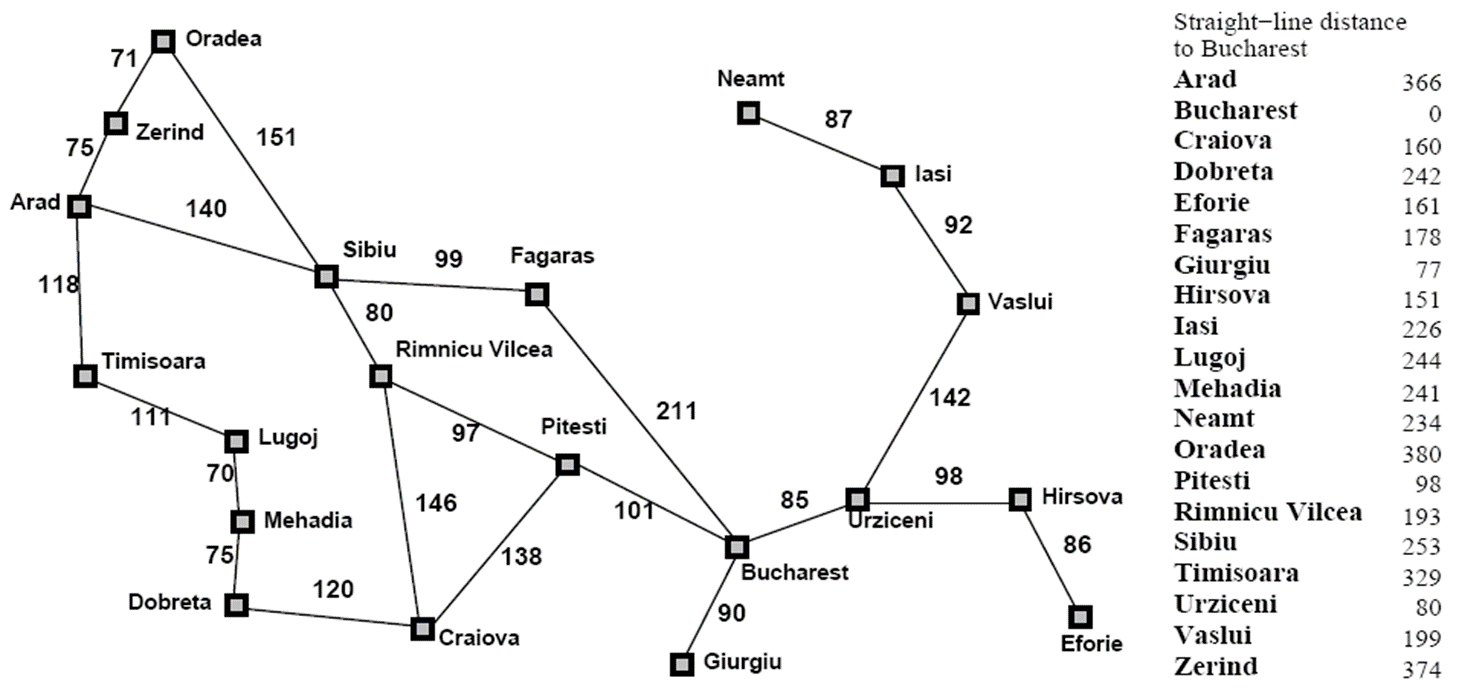

# Solution

In [2]:
graph = {
    'Arad': [['Zerind', 75, 374], ['Timisoara', 118, 329], ['Sibiu', 140, 253]],
    'Zerind': [['Oradea', 71, 380], ['Arad', 75, 366]],
    'Oradea': [['Zerind', 71, 374], ['Sibiu', 151, 253]],
    'Sibiu': [['Rimniciu Vilcea', 80, 193], ['Fagaras', 99, 176], ['Arad', 140, 366], ['Oradea', 151, 380]],
    'Fagaras': [['Sibiu', 99, 253], ['Bucharest', 211, 0]],
    'Rimniciu Vilcea': [['Pitesti', 97, 100], ['Craiova', 146, 160], ['Sibiu', 80, 253]],
    'Timisoara': [['Lugoj', 111, 244], ['Arad', 118, 366]],
    'Lugoj': [['Mehadia', 70, 241], ['Timisoara', 111, 329]],
    'Mehadia': [['Lugoj', 70, 244], ['Dobreta', 75, 242]],
    'Dobreta': [['Mehadia', 75, 241], ['Craiova', 120, 160]],
    'Pitesti': [['Craiova', 138, 160], ['Bucharest', 101, 0]],
    'Craiova': [['Pitesti', 138, 100], ['Dobreta', 120, 242], ['Rimniciu Vilcea', 146, 193]],
    'Bucharest': [['Giurgiu', 90, 77], ['Urziceni', 85, 80], ['Fagaras', 211, 178], ['Pitesti', 101, 100]],
    'Giurgiu': [['Bucharest', 90, 0]],
    'Urziceni': [['Vaslui', 142, 199], ['Hirsova', 98, 151], ['Bucharest', 85, 0]],
    'Vaslui': [['Lasi', 92, 226], ['Urziceni', 142, 80]],
    'Lasi': [['Neamt', 87, 234], ['Vaslui', 92, 199]],
    'Neamt': [['Lasi', 87, 226]],
    'Hirsova': [['Eforie', 86, 161], ['Urziceni', 98, 80]],
    'Eforie': [['Hirsova', 86, 151]],
}

def a_star_traversal(graph, start, goal):
    open_list = [start]
    closed_list = []

    while open_list:
        current = open_list.pop(0)
        if current not in closed_list:
            closed_list.append(current)

        for neighbor in graph[current[0]]:
            if neighbor not in open_list and neighbor not in closed_list:
                open_list.append([neighbor[0], current[1] + neighbor[1], neighbor[2]])

        open_list.sort(key=lambda x: x[1] + x[2])

        if goal_found(closed_list, goal):
            break

    return [node[0] for node in closed_list]

def goal_found(closed_list, goal):
    return any(goal in node for node in closed_list)

result = a_star_traversal(graph, ['Arad', 0, 366], 'Bucharest')
print(result)

['Arad', 'Sibiu', 'Rimniciu Vilcea', 'Fagaras', 'Pitesti', 'Bucharest']


# Lab Tasks:
1. Evaluate the whether the code of A* algorithm is giving correct output or not. Indentify the logical errors in the provided code.
2. Convert the code into a more concise version by levereging the Python Programming contructs.

# Solution

In [3]:
from heapq import heappush, heappop

def a_star_search(graph, start, goal):
    open_list = []
    heappush(open_list, (start[1] + start[2], start))
    closed_list = set()

    while open_list:
        _, current = heappop(open_list)

        if current[0] == goal:
            return current

        if current[0] not in closed_list:
            closed_list.add(current[0])

            for neighbor in graph[current[0]]:
                if neighbor[0] not in closed_list:
                    cost = current[1] + neighbor[1]
                    heappush(open_list, (cost + neighbor[2], [neighbor[0], cost, neighbor[2]]))

    return None

graph = {
    'Arad': [['Zerind', 75, 374], ['Timisoara', 118, 329], ['Sibiu', 140, 253]],
    'Zerind': [['Oradea', 71, 380], ['Arad', 75, 366]],
    'Oradea': [['Zerind', 71, 374], ['Sibiu', 151, 253]],
    'Sibiu': [['Rimniciu Vilcea', 80, 193], ['Fagaras', 99, 176], ['Arad', 140, 366], ['Oradea', 151, 380]],
    'Fagaras': [['Sibiu', 99, 253], ['Bucharest', 211, 0]],
    'Rimniciu Vilcea': [['Pitesti', 97, 100], ['Craiova', 146, 160], ['Sibiu', 80, 253]],
    'Timisoara': [['Lugoj', 111, 244], ['Arad', 118, 366]],
    'Lugoj': [['Mehadia', 70, 241], ['Timisoara', 111, 329]],
    'Mehadia': [['Lugoj', 70, 244], ['Dobreta', 75, 242]],
    'Dobreta': [['Mehadia', 75, 241], ['Craiova', 120, 160]],
    'Pitesti': [['Craiova', 138, 160], ['Bucharest', 101, 0]],
    'Craiova': [['Pitesti', 138, 100], ['Dobreta', 120, 242], ['Rimniciu Vilcea', 146, 193]],
    'Bucharest': [['Giurgiu', 90, 77], ['Urziceni', 85, 80], ['Fagaras', 211, 178], ['Pitesti', 101, 100]],
    'Giurgiu': [['Bucharest', 90, 0]],
    'Urziceni': [['Vaslui', 142, 199], ['Hirsova', 98, 151], ['Bucharest', 85, 0]],
    'Vaslui': [['Lasi', 92, 226], ['Urziceni', 142, 80]],
    'Lasi': [['Neamt', 87, 234], ['Vaslui', 92, 199]],
    'Neamt': [['Lasi', 87, 226]],
    'Hirsova': [['Eforie', 86, 161], ['Urziceni', 98, 80]],
    'Eforie': [['Hirsova', 86, 151]],
}

start = ['Arad', 0, 366]
goal = 'Bucharest'
result = a_star_search(graph, start, goal)
print(result)

['Bucharest', 418, 0]
